# Lariat Waveforms 

Adam Lyon / Fermilab SCD / September 2015

!! Not Complete !!

Jim has code to output the waveform information from a Lariat event. Let's look at it in 3D in ParaView.

The data is in the form of a big CSV file

In [62]:
import numpy as np
import pandas as pd

In [63]:
di = pd.read_csv("data20150919/output_di.csv", header=None)

In [64]:
di.head()

,0,1,2,3,4,5,6,7,8,9,...,3068,3069,3070,3071,3072,3073,3074,3075,3076,3077
0,1,SlicerInput,239,3072,2156.59,1,3,3,3,4,...,-2,-2,-1,-1,0,0,1,1,2,2
1,1,SlicerInput,238,3072,2157.98,1,0,1,2,3,...,-2,-2,-2,-1,-1,0,1,3,4,5
2,1,SlicerInput,237,3072,2153.17,1,6,6,7,8,...,0,1,1,1,1,3,4,3,4,4
3,1,SlicerInput,236,3072,2122.89,1,-3,0,2,0,...,0,-1,-3,-3,1,2,-1,0,2,0
4,1,SlicerInput,235,3072,2146.26,1,-1,-1,-1,-1,...,-1,-1,0,1,0,0,1,1,0,1


Columns `0,1` and `3:5` may be removed. Column 2 is the wire number. The ADC counts start at column 6. 

In [65]:
di.drop(di.columns[0:2], axis=1, inplace=True)
di.drop(di.columns[1:4], axis=1, inplace=True)

In [66]:
di.head()

,2,6,7,8,9,10,11,12,13,14,...,3068,3069,3070,3071,3072,3073,3074,3075,3076,3077
0,239,3,3,3,4,4,4,4,4,4,...,-2,-2,-1,-1,0,0,1,1,2,2
1,238,0,1,2,3,3,5,6,6,6,...,-2,-2,-2,-1,-1,0,1,3,4,5
2,237,6,6,7,8,7,7,7,7,6,...,0,1,1,1,1,3,4,3,4,4
3,236,-3,0,2,0,-2,1,2,-1,-1,...,0,-1,-3,-3,1,2,-1,0,2,0
4,235,-1,-1,-1,-1,-1,0,-1,-1,0,...,-1,-1,0,1,0,0,1,1,0,1


In [67]:
di.shape

(480, 3073)

Let's sort by the wire number so that things come out in the right order. 

In [68]:
di = di.sort_values([2])
di.head()

,2,6,7,8,9,10,11,12,13,14,...,3068,3069,3070,3071,3072,3073,3074,3075,3076,3077
239,0,2,1,1,1,1,1,1,0,0,...,3,3,4,4,3,4,4,4,4,4
238,1,1,0,1,1,1,0,0,1,0,...,2,2,3,3,4,3,4,4,3,4
237,2,2,1,1,1,0,-1,-1,-2,-1,...,0,1,2,2,1,2,1,1,2,1
236,3,0,-1,0,0,0,-1,-1,0,-1,...,5,5,6,7,7,7,7,7,7,6
235,4,2,1,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,4,3,3


There are 480 wires in the event. 240 "U" and 240 "V". Column `2` is the wire number. Wires # < 240 are U and wire # >= 240 are V. 

Let's get the U wires

In [69]:
u = di[ di[2] < 240 ]

In [70]:
u.shape

(240, 3073)

In [71]:
u.head()

,2,6,7,8,9,10,11,12,13,14,...,3068,3069,3070,3071,3072,3073,3074,3075,3076,3077
239,0,2,1,1,1,1,1,1,0,0,...,3,3,4,4,3,4,4,4,4,4
238,1,1,0,1,1,1,0,0,1,0,...,2,2,3,3,4,3,4,4,3,4
237,2,2,1,1,1,0,-1,-1,-2,-1,...,0,1,2,2,1,2,1,1,2,1
236,3,0,-1,0,0,0,-1,-1,0,-1,...,5,5,6,7,7,7,7,7,7,6
235,4,2,1,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,4,3,3


In [72]:
v = di[ di[2] >= 240]

In [73]:
v.head()

,2,6,7,8,9,10,11,12,13,14,...,3068,3069,3070,3071,3072,3073,3074,3075,3076,3077
479,240,4,3,2,3,2,1,0,0,-1,...,5,6,7,7,7,8,8,8,9,8
478,241,2,2,2,2,1,1,1,1,-1,...,-2,-2,-2,-2,-1,0,0,1,2,2
477,242,11,10,9,8,7,6,6,4,4,...,1,1,1,2,4,3,4,4,4,5
476,243,6,5,5,4,3,3,2,2,2,...,0,1,2,2,3,3,4,5,4,5
475,244,1,1,0,0,0,0,0,0,0,...,-1,-1,1,0,1,1,1,2,1,2


In [74]:
v.shape

(240, 3073)

So there are 240 U wires, 240 V wires, and each has 3072 time entries. Each entry has an ampliude. The U and V values go together. What we eventually want is a structure like 

    U,V,T,Uamp,Vamp
    
Where we'll transform `U,V,T` into position values $x,y,z$ with two scalar arrays for the amplitudes. The "cell" is a wire crossing (e.g. U#1 crosses V#200 at a time T with amplitude Uamp on the U wire and Vamp on the V wire))

Let's relable the columns

In [75]:
u.columns = ['U'] + range(3072)
v.columns = ['V'] + range(3072)

In [76]:
u.head()

,U,0,1,2,3,4,5,6,7,8,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
239,0,2,1,1,1,1,1,1,0,0,...,3,3,4,4,3,4,4,4,4,4
238,1,1,0,1,1,1,0,0,1,0,...,2,2,3,3,4,3,4,4,3,4
237,2,2,1,1,1,0,-1,-1,-2,-1,...,0,1,2,2,1,2,1,1,2,1
236,3,0,-1,0,0,0,-1,-1,0,-1,...,5,5,6,7,7,7,7,7,7,6
235,4,2,1,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,4,3,3


In [77]:
v.head()

,V,0,1,2,3,4,5,6,7,8,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
479,240,4,3,2,3,2,1,0,0,-1,...,5,6,7,7,7,8,8,8,9,8
478,241,2,2,2,2,1,1,1,1,-1,...,-2,-2,-2,-2,-1,0,0,1,2,2
477,242,11,10,9,8,7,6,6,4,4,...,1,1,1,2,4,3,4,4,4,5
476,243,6,5,5,4,3,3,2,2,2,...,0,1,2,2,3,3,4,5,4,5
475,244,1,1,0,0,0,0,0,0,0,...,-1,-1,1,0,1,1,1,2,1,2


For the `V` wire #'s bring them back into a range of 0-239 to match the `U` wires

In [78]:
v.loc[:,'V'] = v.loc[:,'V']-240

In [79]:
v.head()

,V,0,1,2,3,4,5,6,7,8,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
479,0,4,3,2,3,2,1,0,0,-1,...,5,6,7,7,7,8,8,8,9,8
478,1,2,2,2,2,1,1,1,1,-1,...,-2,-2,-2,-2,-1,0,0,1,2,2
477,2,11,10,9,8,7,6,6,4,4,...,1,1,1,2,4,3,4,4,4,5
476,3,6,5,5,4,3,3,2,2,2,...,0,1,2,2,3,3,4,5,4,5
475,4,1,1,0,0,0,0,0,0,0,...,-1,-1,1,0,1,1,1,2,1,2


Now we want to reshape data frames to be `U,T,amp` (replace `U` with `V` for the other data frame).

Let's write out VTK image files for the U and V wires (separately) so we can see the wave forms. We'll do $x$ as the time, $y$ as the wire number, and the $z$ will always be 1 (we'll either color or warp to see the amplitude). Note that I previously had the wire as $x$ but I think it will look better with $t$ going horizontally. Loading a VTK image means that the $x$ component iterates first, then $y$, then $z$. So this means that we want data in the form of,

    adcU0T0, adcV0T0
    adcU0T1, adcV0T1
    ...
    adcU0T3071, adc0T3071
    adcU1T0, adcV1T0
    ...
    
So we want to run down the columns and output
    

In [80]:
w = open('waveform.csv', 'w')
w.write("adcU/I,adcV/I\n")  # Attributes of the grid
w.write("%s,%s,1\n" % (u.shape[1]-1, u.shape[0]))  # dimensions  (need to drop the wire number column)
w.write("1,1,1\n")  # Spacing of 1
w.write("0,0,0\n")  # origin

In [81]:
# Writing out x=wire, y=time  Ok - this is really ugly
#for timeCol in range(u.shape[1]-1):
#    out = zip( u.iloc[:, timeCol+1], v.iloc[:, timeCol+1])  # Add one since first col is wire #
#    for i in range(len(out)):
#        w.write("%s,%s  # %s,%s\n" % (out[i][0], out[i][1], i, timeCol) )

In [82]:
# Writing out x=time, y=wire  OK - this is really ugly
for wireRow in range(u.shape[0]):
    out = zip( u.iloc[wireRow][1:], v.iloc[wireRow][1:] )  # Skip the wire number column
    for i in range(len(out)):
        w.write("%s,%s  # time=%s wire=%s\n" % (out[i][0], out[i][1],  i, wireRow) )

In [83]:
w.close()

Convert the CSV file into VTK Imagedata

In [84]:
!pvpython convertCSVToVTI.py waveform.csv

Attribute types are:  [('adcU', <type 'int'>), ('adcV', <type 'int'>)]
Dimensions are:  [3072, 240, 1]
Grid spacing is:  [1.0, 1.0, 1.0]
Grid origin is:  [0.0, 0.0, 0.0]
[('adcU', '<i8'), ('adcV', '<i8')]
Making scalar adcU
Making scalar adcV
Writing waveform.vti


Now we load these into ParaView for viewing. Here are some scripts to make screenshots.

In [113]:
import subprocess as sp
def doParaview(pvsmFile, command, viewWH=None, plugin=None, verbose=False):
    """Run pvpython preparing plugins, view, and state and running command. Returns stdout and stderr"""
    pvpyC = "from paraview.simple import *\n"
    pvpyC += "paraview.simple._DisableFirstRenderCameraReset() # Avoid camera reset\n"
    if plugin:
        pvpyC += 'LoadPlugin("%s", True, globals())\n' % plugin
    pvpyC += 'LoadState("%s")\n' % pvsmFile
    pvpyC += 'r=GetActiveViewOrCreate("RenderView")\n'
    if viewWH:
        pvpyC += 'r.ViewSize=[%s,%s]\n' % (viewWH[0], viewWH[1])    
    pvpyC += 'RenderAllViews()\n'
    pvpyC += command
    
    if verbose:
        print 'Commands:'
        print pvpyC

    p = sp.Popen("pvpython", stdin=sp.PIPE, stdout=sp.PIPE, stderr=sp.PIPE)
    so, se = p.communicate(input=pvpyC)
    
    if so != '':
        print so
        
    if se != '':
        print se
    
    return so, se

In [122]:
from IPython.display import Image
import os
def paraviewScreenShot(pvsmFile, imageDir="images", viewWH=None, mag=1, plugin=None, verbose=False):
    """Make a screenshot from a state file"""

    fname, fext = os.path.splitext( os.path.basename(pvsmFile) )
    pngFile = imageDir + "/" + fname + ".png"
    command  = 'r.CenterAxesVisibility=1 ; r.CenterAxesVisibility=0\n'  # Toggle to make grid come out right
    command += 'layout=GetLayout()\n'
    command += 'SaveScreenshot("%s", layout=layout, magnification=%s)\n' % (pngFile, mag)
    
    so, se = doParaview(pvsmFile, command, viewWH, plugin, verbose)
    
    if not se:
        return Image(filename=pngFile)

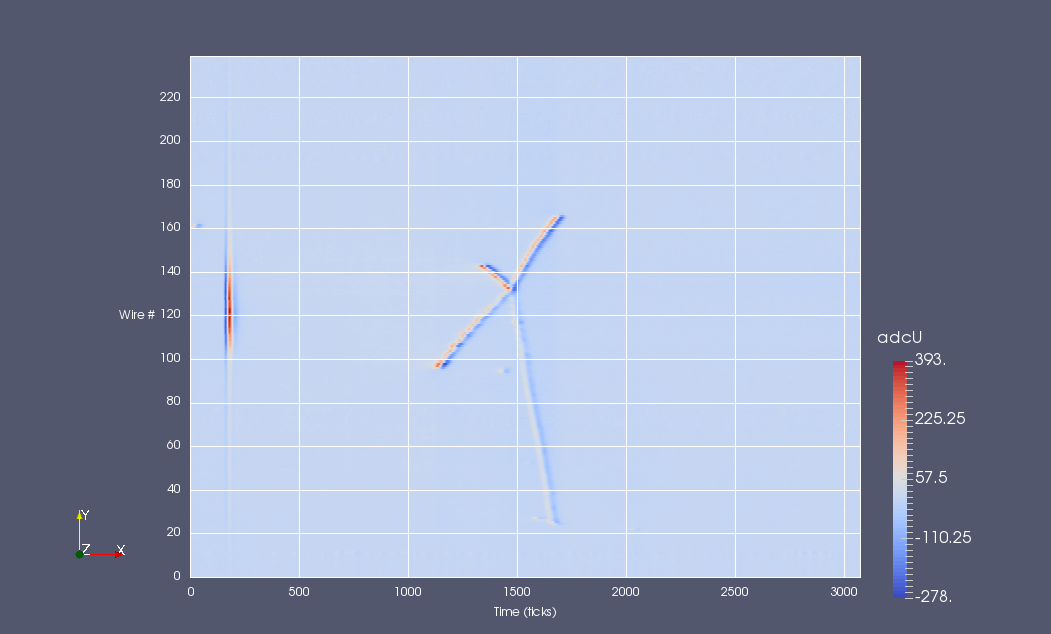

In [123]:
paraviewScreenShot("state/wvpng_1a.pvsm")

The above is the wire ADC for the U (induction) wires. 

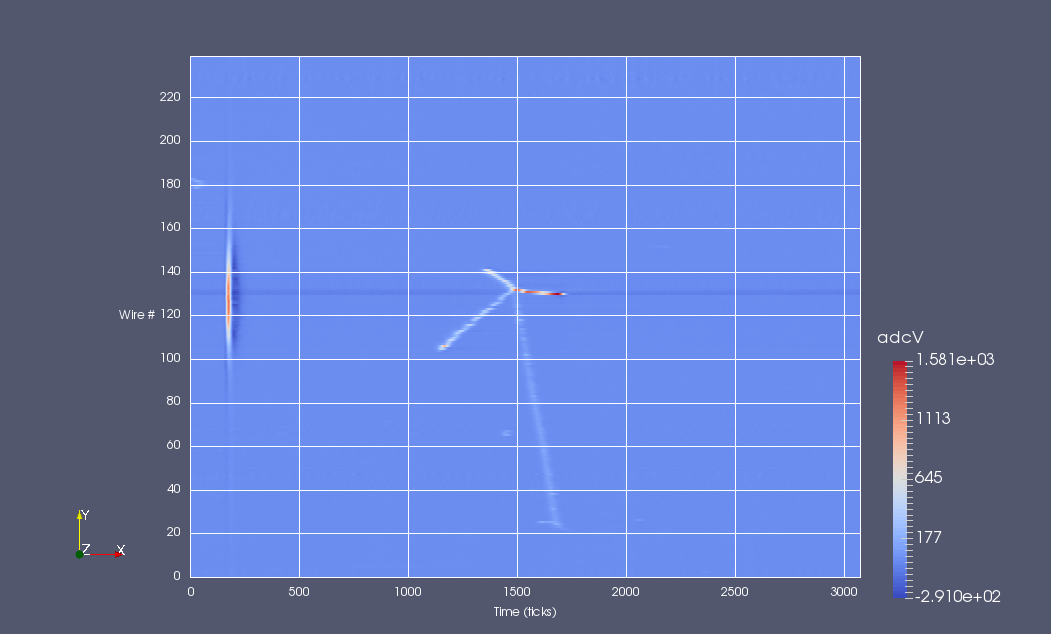

In [124]:
paraviewScreenShot("state/wvpng_1b.pvsm")

The above is the wire ADC for the V (collection) wires.

We can also warp the mesh (by adding the point) by using the warp (scalar) filter.

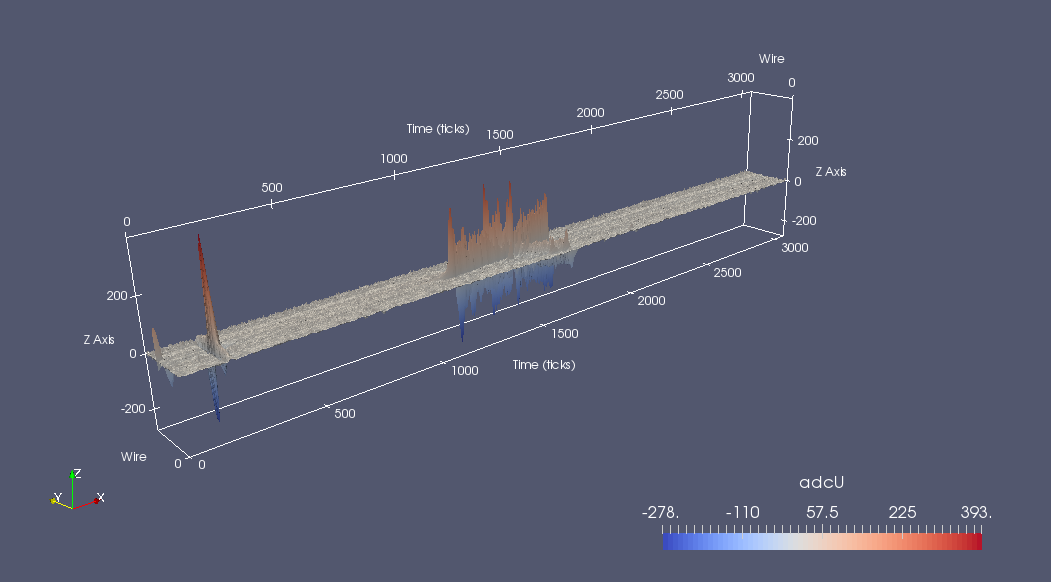

In [125]:
paraviewScreenShot("state/wvpng_2a.pvsm")

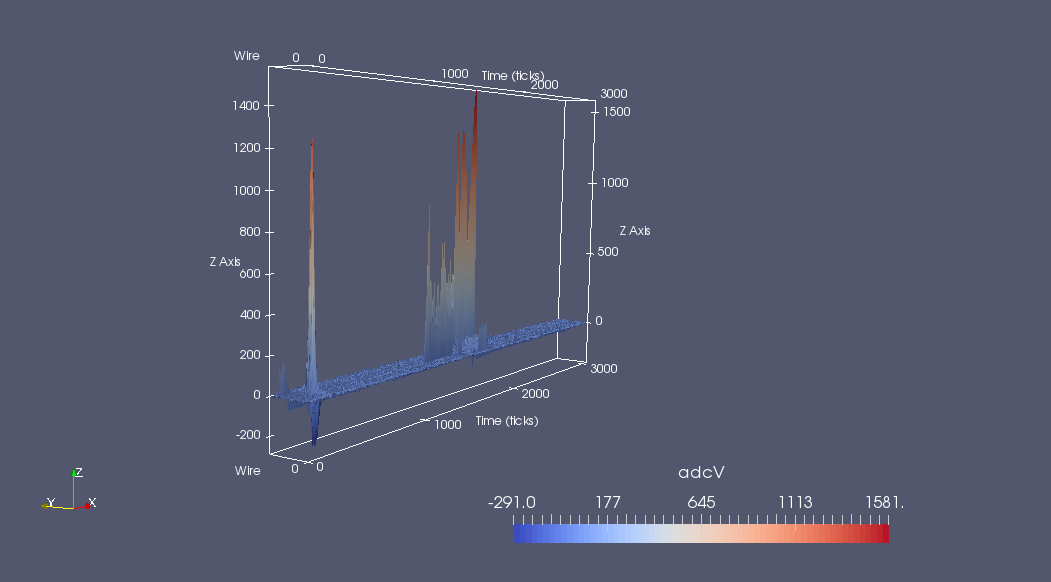

In [126]:
paraviewScreenShot("state/wvpng_2b.pvsm")

## Wire intersections

What we'd like to do now is write out a 3-D image where $x,y,z$ is $u,v,t$ where $u$ is the U (induction) wire #, $v$ is the V (collection) wire number and $t$ is the time tick. We'll write out both U and V adc counts.

In [107]:
npts = u.shape[0]*u.shape[0]*(u.shape[1]-1); npts/1e6

176.9472

The above is in **millions**. The above is how many points we'll have. That's a lot! We're writing out two 32 bit integers for each, then we'll have...

In [92]:
nbytes = 2.0 * (32/8) * npts ; nbytes/(1024**3)

1.318359375

So the data is around 1.31 Gig

An interesting test!

Let's make the data first. We want the time slices to be varying the slowest, which is good so then we can easily control how many we want.

Writing out CSV files will be horribly slow. We can pretty easily save to a numpy file and perhaps load that directly into ParaView. 

In [164]:
timeStart = 0; timeEnd = 3071   # Start at slice 0 (column 1) and go to timeEnd inclusive

So the idea here is to, for a particular time slice, extract the U and V amplitudes and do a "cartesian product" to combine them (see http://goo.gl/zoxAcu). Then stack the time slices together into one long array. That should have the U wire changing fastest, then V wire, then the time slice. The result is amazingly fast!

In [179]:
adcs = []
for timeCol in range(timeStart+1, timeEnd+2):  # Add one to pass wire column, and another 1 to timeEnd for inclusive
    adcuv = np.dstack(np.meshgrid(u.iloc[:, timeCol], v.iloc[:, timeCol])).reshape(-1, 2)
    adcs.append(adcuv)

In [180]:
len(adcs)

3072

In [181]:
out = np.vstack(adcs)

In [182]:
len(out)

176947200

In [183]:
np.save("waveform3D", out)

In [184]:
!ls -lh waveform3D.npy

-rw-r--r--  1 lyon  staff   2.6G Sep 29 13:03 waveform3D.npy


Now, we want to write a Programmable source to load this data into ParaView. 

Here's a convenient programmable source.

This part goes into the main script (`RequestData`)
```python
import numpy as np
import vtk.util.numpy_support as ns
import vtk

# Load the data
d = np.load("/Users/lyon/dataAnalysisPlatform/Documents/Paraview/Lariat/waveform3D.npy")

# The first slice is the adcU, the second is adcV
adcU = d[:,0]
adcV = d[:,1]

# Now start filling!
o = output
o.SetExtent(0, 239, 0, 239, 0, 3071)
o.SetSpacing(1, 1, 1)
o.SetOrigin(0, 0, 0)

adcUArr = ns.numpy_to_vtk( adcU.ravel(), 1, vtk.VTK_INT )
o.PointData.append(adcUArr, "adcU")

adcVArr = ns.numpy_to_vtk( adcV.ravel(), 1, vtk.VTK_INT )
o.PointData.append(adcVArr, "adcV")

o.PointData.SetActiveScalars("adcU")

```

And this part goes into the `RequestInformation` script

```python
executive = self.GetExecutive()  # Gets self
outInfo = executive.GetOutputInformation(0)

outInfo.Set(executive.WHOLE_EXTENT(), 0, 239, 0, 239, 0, 3071)
outInfo.Set(vtk.vtkDataObject.SPACING(), 1, 1, 1)
```


See the `wv3d_start.pvsm` state file to load the data. 

Follow Jim's algorithm in mail message https://goo.gl/I7h1qX

Now let's clean up the data. Let's get rid of noise by setting to zero adc counts that are within 2$\sigma$ of the mean.

Here's code for a programmable filter (Clean) that will do the cleaning...

```python
from vtk.numpy_interface import algorithms as algs
import numpy as np

def cleanPoints(a):
    """Same as Jim's norm.plane"""
    theCut = algs.mean(a) + 2.0*algs.std(a)
    a[ abs(a) < theCut ] = 0

i = inputs[0]
adcU = i.PointData["adcU"].copy()
cleanPoints( adcU )
output.PointData.append(adcU, "adcU")

adcV = i.PointData["adcV"].copy()
cleanPoints( adcV )
output.PointData.append(adcV, "adcV")
```

Now, let's match hits on wires. We accept a match if the U and V amplitudes are within 15 counts of each other. The following goes into the Match programmable filter.

```python
from vtk.numpy_interface import algorithms as algs
import numpy as np

i = inputs[0]
u = i.PointData["adcU"]
v = i.PointData["adcV"]

adcM = algs.floor(1/(algs.abs(u-v)//15+1)) * u

output.PointData.append(adcM, "adcM")
```

So what that will do is look to see if the U and V adc counts are within 15, and if they are then write out the u value. Otherwise write out zero.

We have to copy points to cells to use Threshold, then use a Threshold fitler to select match ADC > 15.

We can see that this worked - see `statewv3d_track_movie.pvsm` (takes awhile to load)

In [99]:
from IPython.display import HTML
import subprocess
def paraviewAnimation(pvsmFile, movieDir="movies", frameRate=20.0, width=1000, plugin=None, verbose=False):
    """Make an animation from a state file"""
    
    fname, fext = os.path.splitext( os.path.basename(pvsmFile) )
    ogvFile = movieDir + "/" + fname + ".ogv"

    command = 'WriteAnimation("%s", FrameRate=%s, Compression=True)\n' % (ogvFile, frameRate)
    
    so, se = doParaview(pvsmFile, command, plugin=plugin, verbose=verbose)
    
    if not se:
        # Convert to mp4 - since that seems to work on all systems
        mp4File = os.path.splitext( ogvFile )[0] + ".mp4"
        st = subprocess.call(["ffmpeg", "-hide_banner", "-loglevel", "panic", "-i", ogvFile, 
                        "-f", "mp4", "-vcodec", "libx264", "-pix_fmt", "yuv420p", mp4File])
        video_tag = '<video controls width=%s src="%s">No video</video>' % (width, mp4File)
        return HTML(data=video_tag)  

In [100]:
paraviewAnimation("state/wv3d_track_movie.pvsm", frameRate=15)

## Visual Reconstruction

Let's see if we can do more visual reconstruction in ParaView. 

We'll also try to use the GPU cluster with 4 GPUs. Getting started...

To make things easier, we're going to write out the data as a vti file called `waveform3D.vti`. Loading this file in a parallel environment (e.g. multiple gpus) would be very slow, especially if running on multiple machines (data needs to be read, broken up, and then shipped to the other nodes). Since my Mac has a fast SSD and multiple GPUs, run multiple `pvserver` processes (use the `mpirun` from `~/Development/paraview`), load in the data, and write out to a `.pvti` file, with the number of processes in the name. Then copy those files to the visualization cluster and load them. The multi-processes will do that much more quickly. 

Running in one process (takes 7.8 Gig according to the Memory Inspector), here are the steps to follow for a rudimentary reconstruction.

* Normalize the `adcU` and `adcV` vectors by adding a python calculator filter for each with the expression (replace adcU for adcV where appropriate). Note that for `adcU` (the induction plane) we take the absolute value to take care of the bi-polar waveform.  Output array name is `adcU_norm`

```python
abs(adcU)/max(adcU)
```
  

* Now we want to add them so that we get large values where they cross. Make another python programmable filter with the expression, (Output array name is `adc_add`). We will **not** copy arrays, to hopefully avoid a GPU volume rendering bug (see below). 

```python
adcU_norm + adcV_norm
``` 
    
One can do several things at this point. You can turn on `Volume rendering` and see where hotspots are. Or you can do `PointDataToCellData` and then `Threshold` 

Note that there's a bug (see http://www.vtk.org/Bug/bug_relationship_graph.php?bug_id=14206&graph=dependency) where if you do GPU volume rendering, only the first scalar filed is shown, no matter which one you pick. 

Note that when I do volume render on `adc_add` and choose `Smart` or `GPU` rendering, the `pvserver` crashes with
```
ERROR: In /home/lyon/paraviewGit/paraviewSrc/VTK/Imaging/Core/vtkAbstractImageInterpolator.cxx, line 258
vtkImageInterpolator (0x875e590): Initialize(): no image data to interpolate!
```
Use `Ray tracing` rendering instead. I think the right way to get around this is to do as much of the processing as possible in python outside of Paraview, and then load in just the right values into ParaView (e.g. pre-process `adc_add` and load that directly into ParaView).